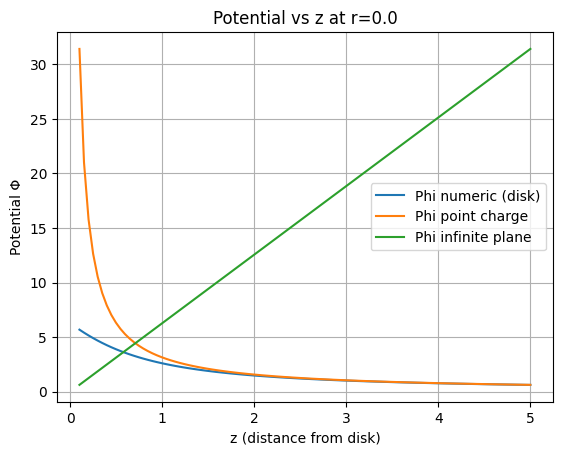

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import j0, j1

# Parameters
sigma = 1.0     # charge density
a = 1.0         # disk radius
Q = np.pi * a**2 * sigma  # total charge

# Define A(k) coefficient
def A(k):
    return 2 * np.pi * sigma * a * j1(k * a) / k

# Numerical potential Phi(r, z) via Hankel integral
def phi_numerical(r, z):
    integrand = lambda k: A(k) * j0(k * r) * np.exp(-k * abs(z))
    val, _ = quad(integrand, 0, np.inf, limit=200)
    return val

# Define limiting potentials
def phi_point_charge(r, z):
    return Q / np.sqrt(r**2 + z**2)

def phi_plane(z):
    return 2 * np.pi * sigma * abs(z)

# Choose a fixed r and range of z values
r_fixed = 0.0
z_vals = np.linspace(0.1, 5.0, 100)

# Compute potentials
phi_num = np.array([phi_numerical(r_fixed, z) for z in z_vals])
phi_pc = phi_point_charge(r_fixed, z_vals)
phi_pl = phi_plane(z_vals)

# Plotting
plt.figure()
plt.plot(z_vals, phi_num, label='Phi numeric (disk)')
plt.plot(z_vals, phi_pc, label='Phi point charge')
plt.plot(z_vals, phi_pl, label='Phi infinite plane')
plt.xlabel('z (distance from disk)')
plt.ylabel('Potential Φ')
plt.title(f'Potential vs z at r={r_fixed}')
plt.legend()
plt.grid(True)
plt.show()
